# data import

In [96]:


import pandas as pd
data = pd.read_csv(r'C:\Users\asus\Desktop\output.csv')
print (data) 
data.dtypes

         BN TOF AF  DS feeder        RC TOP Relay COB   PD  COP  \
0     88644   A  A   A      A  0.177419   A     A   A  NaN  NaN   
1     88645   A  B   B      B  0.145161   A     A   B    B    B   
2     88648   A  A   C      C  0.032258   A     A   C  NaN  NaN   
3     88657   A  A   A      D  0.048387   A     A   D    C    C   
4     88664   A  C   D      A  0.161290   A     B   E    D    D   
...     ...  .. ..  ..    ...       ...  ..   ...  ..  ...  ...   
1644  96326   A  L  BB      G  0.096774   A     A   F    C    C   
1645  96335   A  C   E      C  0.193548   A     A   I  NaN  NaN   
1646  96346   A  H   M      E  0.274194   A     A   R  NaN  NaN   
1647  96347   A  H   X      C  0.258065   A     A   X  NaN  NaN   
1648  96349   A  D  PP      H  0.064516   A     A   D    C    C   

                   DFB               CFB  DOFDB                PS  STOLP  \
0     1398/01/01 06:54  1398/01/01 06:59      5               NaN    NaN   
1     1398/01/01 07:15  1398/01/01 07:17   

BN          int64
TOF        object
AF         object
DS         object
feeder     object
RC        float64
TOP        object
Relay      object
COB        object
PD         object
COP        object
DFB        object
CFB        object
DOFDB       int64
PS         object
STOLP     float64
EENS      float64
dtype: object

# seperate DATE and TIME

In [97]:
data[['date begin','time begin']] = data.DFB.str.split(" ",expand=True,)
data[['date end','time end']] = data.CFB.str.split(" ",expand=True,)
print(data)


         BN TOF AF  DS feeder        RC TOP Relay COB   PD  ...  \
0     88644   A  A   A      A  0.177419   A     A   A  NaN  ...   
1     88645   A  B   B      B  0.145161   A     A   B    B  ...   
2     88648   A  A   C      C  0.032258   A     A   C  NaN  ...   
3     88657   A  A   A      D  0.048387   A     A   D    C  ...   
4     88664   A  C   D      A  0.161290   A     B   E    D  ...   
...     ...  .. ..  ..    ...       ...  ..   ...  ..  ...  ...   
1644  96326   A  L  BB      G  0.096774   A     A   F    C  ...   
1645  96335   A  C   E      C  0.193548   A     A   I  NaN  ...   
1646  96346   A  H   M      E  0.274194   A     A   R  NaN  ...   
1647  96347   A  H   X      C  0.258065   A     A   X  NaN  ...   
1648  96349   A  D  PP      H  0.064516   A     A   D    C  ...   

                   DFB               CFB DOFDB                PS  STOLP  \
0     1398/01/01 06:54  1398/01/01 06:59     5               NaN    NaN   
1     1398/01/01 07:15  1398/01/01 07:17     

In [114]:
data[['year','month','day']] = data.DFB.str.split("/",expand=True,)
data.head()

,BN,TOF,AF,DS,feeder,RC,TOP,Relay,COB,PD,...,PS,STOLP,EENS,date begin,time begin,date end,time end,year,month,day
0,88644,A,A,A,A,0.177419,A,A,A,NaN,...,NaN,NaN,0.010946,1398/01/01,06:54,1398/01/01,06:59,1398,01,01 06:54
1,88645,A,B,B,B,0.145161,A,A,B,B,...,NaN,NaN,0.003127,1398/01/01,07:15,1398/01/01,07:17,1398,01,01 07:15
2,88648,A,A,C,C,0.032258,A,A,C,NaN,...,NaN,NaN,0.016419,1398/01/01,12:03,1398/01/01,12:45,1398,01,01 12:03
3,88657,A,A,A,D,0.048387,A,A,D,C,...,1398/01/02 08:15,415.0,0.039093,1398/01/02,01:20,1398/01/02,02:25,1398,01,02 01:20
4,88664,A,C,D,A,0.161290,A,B,E,D,...,1398/01/02 22:00,334.0,0.075059,1398/01/02,16:26,1398/01/02,16:50,1398,01,02 16:26


# choose columns we need

In [115]:
dataset=data[data.columns.difference(['time end','time begin','EENS','STOLP','PS','CFB','DFB','PD','Relay','TOP','RC','DS','TOF','BN','COP','year','day'])]
print(dataset)

     AF COB  DOFDB  date begin    date end feeder month
0     A   A      5  1398/01/01  1398/01/01      A    01
1     B   B      2  1398/01/01  1398/01/01      B    01
2     A   C     42  1398/01/01  1398/01/01      C    01
3     A   D     65  1398/01/02  1398/01/02      D    01
4     C   E     24  1398/01/02  1398/01/02      A    01
...  ..  ..    ...         ...         ...    ...   ...
1644  L   F      9  1398/12/29  1398/12/29      G    12
1645  C   I     52  1398/12/29  1398/12/29      C    12
1646  H   R     39  1398/12/29  1398/12/29      E    12
1647  H   X      2  1398/12/29  1398/12/29      C    12
1648  D   D      6  1398/12/29  1398/12/29      H    12

[1649 rows x 7 columns]


# Removin empty values

In [116]:
dataset.isnull().any()

AF            False
COB           False
DOFDB         False
date begin    False
date end       True
feeder        False
month         False
dtype: bool

In [117]:
for column in dataset.columns:
    print(" * " + column + " : "+ str(dataset[column].isnull().sum()))

 * AF : 0
 * COB : 0
 * DOFDB : 0
 * date begin : 0
 * date end : 3
 * feeder : 0
 * month : 0


In [118]:
dataset = dataset.dropna()
for column in dataset.columns:
    print(" * " + column + " : "+ str(dataset[column].isnull().sum()))

 * AF : 0
 * COB : 0
 * DOFDB : 0
 * date begin : 0
 * date end : 0
 * feeder : 0
 * month : 0


In [119]:
dataset.reset_index()
dataset.head()

,AF,COB,DOFDB,date begin,date end,feeder,month
0,A,A,5,1398/01/01,1398/01/01,A,01
1,B,B,2,1398/01/01,1398/01/01,B,01
2,A,C,42,1398/01/01,1398/01/01,C,01
3,A,D,65,1398/01/02,1398/01/02,D,01
4,C,E,24,1398/01/02,1398/01/02,A,01


In [120]:
dataset.loc[dataset['DOFDB'].idxmax()]

AF                     I
COB                    D
DOFDB              47961
date begin    1398/01/06
date end      1398/02/08
feeder                 I
month                 01
Name: 26, dtype: object

# categorical encoding(one hot encoding)

In [121]:
Feeder = dataset['feeder'].unique()
print(Feeder)
Feeder = pd.get_dummies(dataset['feeder'],drop_first=False)
print(Feeder.columns)

COB = dataset['COB'].unique()
COB = pd.get_dummies(dataset['COB'],drop_first=False)
AF = dataset['AF'].unique()
AF = pd.get_dummies(dataset['AF'],drop_first=False)

dataset = pd.concat([dataset,Feeder], axis =1)
dataset = pd.concat([dataset,COB], axis =1)
dataset = pd.concat([dataset,AF], axis =1)
dataset.head()


['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O'],
      dtype='object')


,AF,COB,DOFDB,date begin,date end,feeder,month,A,B,C,...,F,G,H,I,J,K,L,M,N,O
0,A,A,5,1398/01/01,1398/01/01,A,01,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B,B,2,1398/01/01,1398/01/01,B,01,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,A,C,42,1398/01/01,1398/01/01,C,01,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,A,D,65,1398/01/02,1398/01/02,D,01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C,E,24,1398/01/02,1398/01/02,A,01,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Analysis

<AxesSubplot:xlabel='month', ylabel='count'>

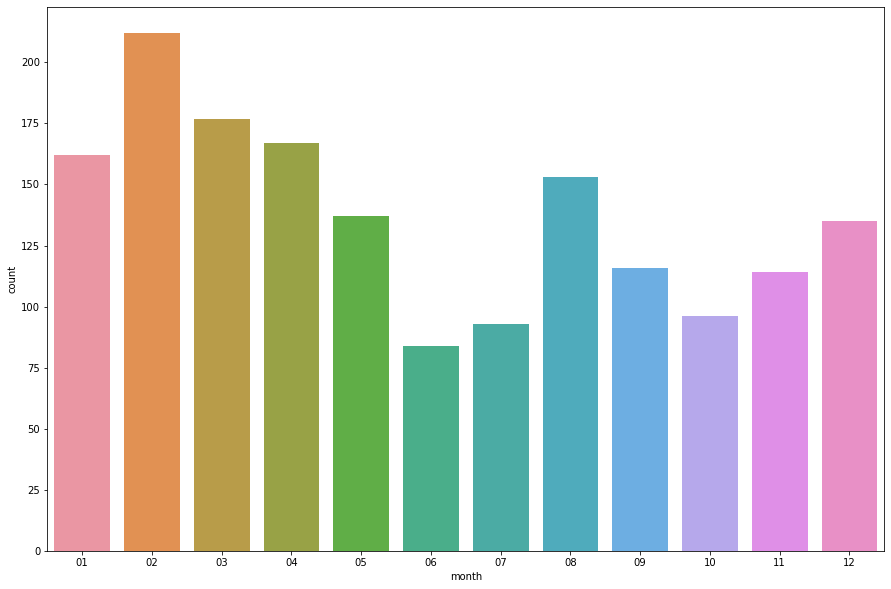

In [122]:
######### Events Per Month
dim=(15,10)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='month', ax=ax, data=dataset)

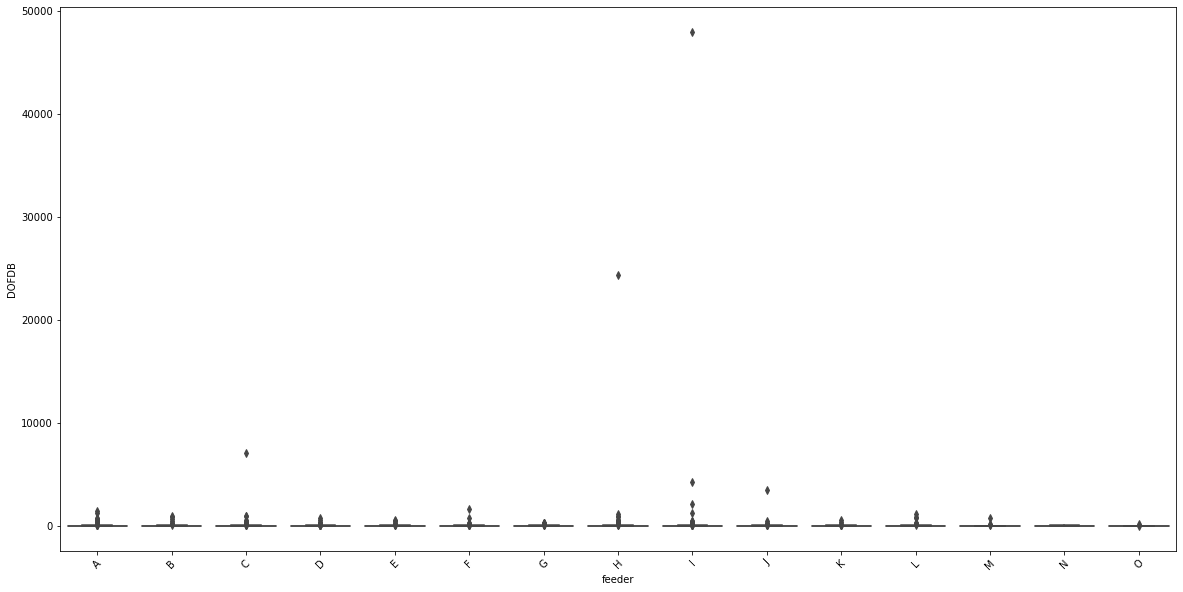

In [154]:
######## Outage duration per feeder
fig,ax = plt.subplots(figsize=dim)
demand_plot = sns.boxplot(x="feeder",y="DOFDB",ax=ax, data=dataset)

for item in demand_plot.get_xticklabels():
    item.set_rotation(45)


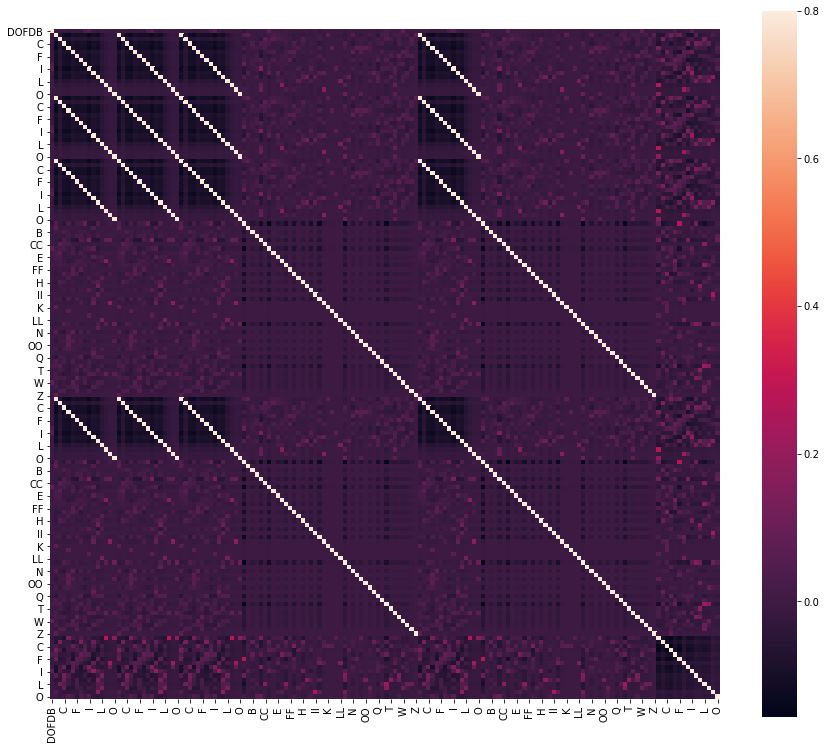

In [112]:

import matplotlib.pyplot as plt
import seaborn as sns
corrmat = dataset.corr()
f,ax = plt.subplots(figsize=(15,13))
sns.heatmap(corrmat,vmax=.8,square=True);

# Data preparation

In [127]:
output = dataset.iloc[:,2]
features = dataset[dataset.columns.difference(['DOFDB','date begin','date end','month','AF','COB','feeder'])]

features.head()
output.head()

0     5
1     2
2    42
3    65
4    24
Name: DOFDB, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split
features_train,features_test,duration_train,duration_test = train_test_split(features,output,test_size = 0.3, random_state =0)

# SVR

In [143]:
def fit_and_pred_grid_classifier(regressor, param_grid, X_train, X_test,y_train,y_test, folds=5):
    grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid,cv=folds, n_jobs = -1, verbose =0)
    grid_search.fit(X_train,y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    
    grid_search_pred = grid_search.predict(X_test)
    
    
    print("MSE:" + str(mean_squared_error(y_test,grid_search_pred)))
    print("R2:" + str(r2_score(y_test,grid_search_pred)))
    print("best parameter combination:" + str(best_parameters))  
    return grid_search_pred

In [152]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
regressor = SVR(kernel = 'rbf', C=10,gamma=0.1)
param_grid= [
    {
        'C': [400, 450, 500, 550, 600],
             'kernel': ['linear'],
             'epsilon': [550, 600, 650, 700, 750],},
             {
                 'C': [12,13,14,15,20],
                 'kernel': ['rbf','sigmoid'],
                 'gamma': [0.3, 0.4, 0.5, 1],
                 'epsilon': [10 ,100 , 500, 750, 1000],
             },
            ]
             
pred = fit_and_pred_grid_classifier(regressor,param_grid,features_train,features_test,duration_train,duration_test)

MSE:153172.1607927058
R2:-0.010922469740002105
best parameter combination:{'C': 20, 'epsilon': 10, 'gamma': 0.5, 'kernel': 'rbf'}


ValueError: Grouper and axis must be same length

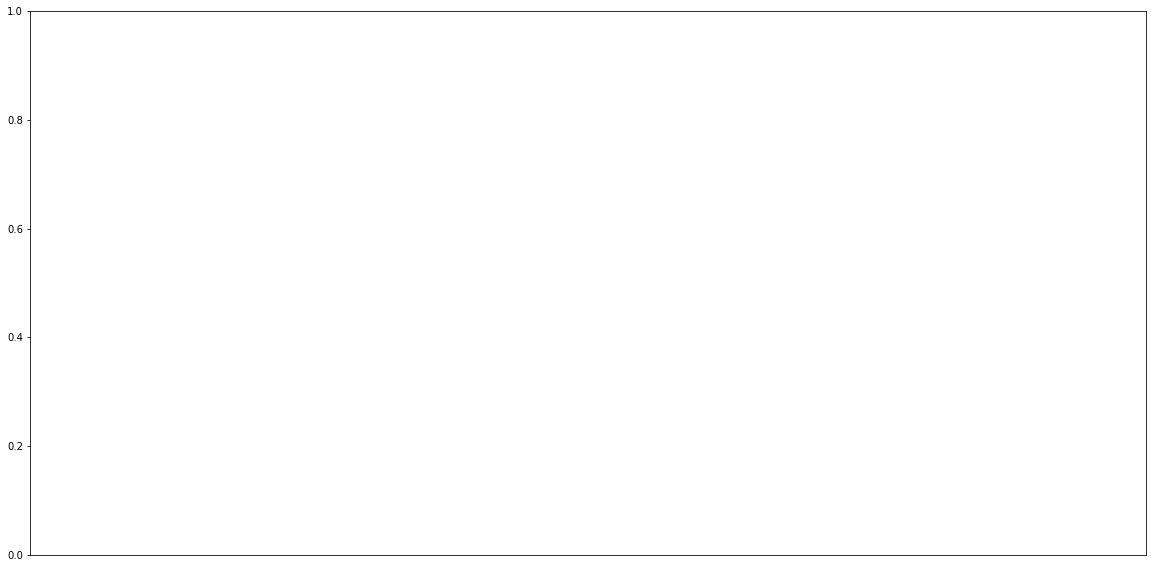

In [153]:
import numpy as np
X_grid = np.arange(1,367)

dim = (20,10)
fig, ax = plt.subplots(figsize=dim)
ax.set_xticks([])
plot_1 = sns.swarmplot(x=X_grid, y=duration_test,color='green')
plot_2= sns.swarmplot(x=X_grid, y=pred,color='red')
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})

for item in plot_1.get_xticklabels():
    item.set_visible(False)
for item in plot_2.get_xticklabels():
    item.set_visible(False)    